In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.patches as patches
import astropy.coordinates as coord
import astropy.units as u
from astropy.io import fits, ascii
from astropy.table import Table
from astropy.coordinates import SkyCoord

In [2]:
plt.rcParams['font.family'] = 'sans-serif' 
plt.style.use('default')
#specifies arial as the preferred font for plots
plt.rcParams['font.sans-serif'] = ['Arial']

plt.rcParams['axes.titlesize'] = 14  # font size for plot titles
plt.rcParams['axes.labelsize'] = 12  # font size for x and y axis labels
plt.rcParams['xtick.labelsize'] = 10 # font size for x-axis tick labels
plt.rcParams['ytick.labelsize'] = 10 # font size for y-axis tick labels
plt.rcParams['legend.fontsize'] = 10 # font size for legend
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['ytick.major.size'] = 10

In [3]:
agb_ages_comparison_file = 'Task_12_APOKASC3_Age_Comparison_Donley.csv'
agb_comparisons = Table.read(agb_ages_comparison_file, format='csv')
agb_comparisons

KIC,Seismic_Age_Gyr,Pred_Age_A_Gyr,Pred_Age_B_Gyr,Difference_B_minus_A
int64,float64,float64,float64,float64
11403437,12.3847,9.203126283705235,9.911846534746886,0.708720251041651
11403541,4.385,1.9199293158084154,1.9767280043035744,0.05679868849515901
11403918,5.4317,5.602169536721706,5.875329381972551,0.273159845250845
11404916,7.3456,5.198682663738728,5.913728009885549,0.7150453461468214
11404925,0.9791,3.0285243493974208,1.884916669848561,-1.1436076795488597
11408237,5.9369,5.252758542597293,5.689758198702335,0.43699965610504155
11408704,5.6681,5.184697809529304,5.445878362011909,0.26118055248260497
11409529,22.5509,9.877474479967356,9.030485772126912,-0.8469887078404437
11409562,11.6597,9.144448012739419,9.738208293491601,0.593760280752182


In [ ]:
agb_classification = Table.read('table4.dat', format='ascii')
agb_stars_mask = np.where(agb_classification['col7'] == 2) #In the paper stars that are candididate AGB stars have a classification number of 2
agb_stars = agb_classification[agb_stars_mask]
agb_stars

col1,col2,col3,col4,col5,col6,col7
int64,int64,int64,float64,float64,float64,int64
10004975,4099,69,1.35,0.05,101.12,2
10057676,3904,67,1.02,0.05,88.45,2
10065692,4105,71,1.4,0.06,95.33,2
10255401,4513,99,1.24,0.09,210.61,2
10256752,4373,84,1.4,0.08,150.22,2
10258913,4286,92,1.61,0.06,158.05,2
10285430,4331,80,1.84,0.05,140.0,2
10290718,4462,83,2.03,0.06,121.8,2
10334458,4697,118,1.42,0.09,131.64,2


In [12]:
intersect, ind_comp, ind_star = np.intersect1d(agb_comparisons['KIC'], agb_stars['col1'], return_indices=True)
agb_stars_comp = agb_comparisons[ind_comp]
agb_stars_info = agb_stars[ind_star]

Text(0.5, 1.0, 'Difference In Age for Vrard et al. 2025 AGB Stars')

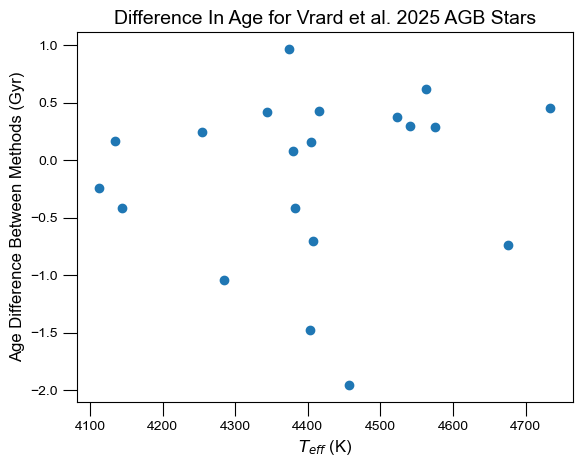

In [16]:
plt.scatter(agb_stars_info['col2'], agb_stars_comp['Difference_B_minus_A'])
plt.xlabel('$T_{eff}$ (K)')
plt.ylabel('Age Difference Between Methods (Gyr)')
plt.title('Difference In Age for Vrard et al. 2025 AGB Stars')